# [**Regroupement spectral pour la segmentation d'images**](https://nbviewer.org/github/Franck-PepperLabs/pepper_dsia_skl_doc_fr/blob/main/docs/examples/2_3_cluster/plot_segmentation_toy.ipynb)<br/>([*Spectral clustering for image segmentation*](https://scikit-learn.org/stable/auto_examples/cluster/plot_segmentation_toy.html))

Dans cet exemple, une image avec des cercles connectés est générée et le regroupement spectral est utilisé pour séparer les cercles.

Dans ce contexte, l'approche du [**Regroupement spectral** (2.3.5)](https://scikit-learn.org/stable/modules/clustering.html#spectral-clustering) résout le problème connu sous le nom de "coupes de graphes normalisées" :  l'image est considérée comme un graphe de voxels connectés, et l'algorithme de regroupement spectral consiste à choisir des coupes de graphe définissant des régions tout en minimisant le rapport du gradient le long de la coupe et le volume de la région.

Comme l'algorithme tente d'équilibrer les volumes (c'est-à-dire d'équilibrer les tailles des régions), si nous prenons des cercles de tailles différentes, la segmentation échoue.

De plus, étant donné qu'il n'y a pas d'information utile dans l'intensité de l'image ni dans son gradient, nous choisissons d'appliquer le regroupement spectral sur un graphe qui est uniquement légèrement influencé par le gradient. Cela est proche de l'exécution d'une partition de Voronoi sur le graphe.

De plus, nous utilisons le masque des objets pour limiter le graphe au contour des objets. Dans cet exemple, notre objectif est de séparer les objets les uns des autres, et non du fond.

In [ ]:
# Authors:  Emmanuelle Gouillart <emmanuelle.gouillart@normalesup.org>
#           Gael Varoquaux <gael.varoquaux@normalesup.org>
# License: BSD 3 clause

# Générer les données

In [1]:
import numpy as np

l = 100
x, y = np.indices((l, l))

center1 = (28, 24)
center2 = (40, 50)
center3 = (67, 58)
center4 = (24, 70)

radius1, radius2, radius3, radius4 = 16, 14, 15, 14

circle1 = (x - center1[0]) ** 2 + (y - center1[1]) ** 2 < radius1**2
circle2 = (x - center2[0]) ** 2 + (y - center2[1]) ** 2 < radius2**2
circle3 = (x - center3[0]) ** 2 + (y - center3[1]) ** 2 < radius3**2
circle4 = (x - center4[0]) ** 2 + (y - center4[1]) ** 2 < radius4**2

# Afficher 4 cercles

In [2]:
img = circle1 + circle2 + circle3 + circle4

# We use a mask that limits to the foreground: the problem that we are
# interested in here is not separating the objects from the background,
# but separating them one from the other.
mask = img.astype(bool)

img = img.astype(float)
img += 1 + 0.2 * np.random.randn(*img.shape)

Conversion de l'image en un graphe avec la valeur du dégradé sur les bords.

In [4]:
from sklearn.feature_extraction import image

graph = image.img_to_graph(img, mask=mask)

Utilisation d'une fonction décroissante du gradient pour obtenir une segmentation proche d'une partition de Voronoi.

In [5]:
graph.data = np.exp(-graph.data / graph.data.std())

Ici, nous effectuons le regroupement spectral en utilisant le solveur arpack car amg est numériquement instable dans cet exemple. Ensuite, nous traçons les résultats.

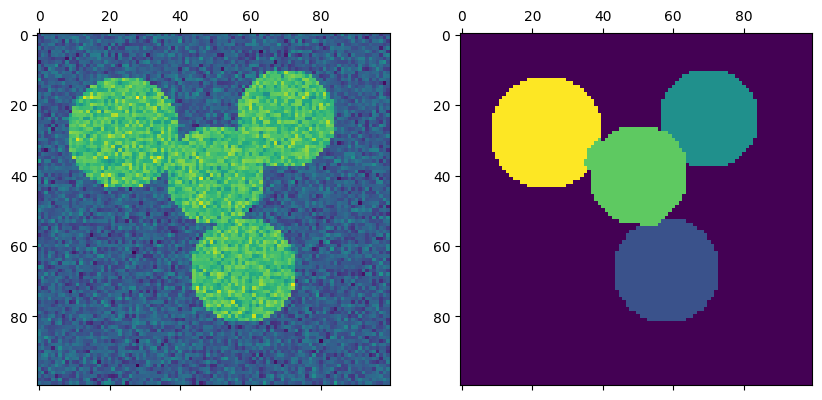

In [6]:
from sklearn.cluster import spectral_clustering
import matplotlib.pyplot as plt

labels = spectral_clustering(graph, n_clusters=4, eigen_solver="arpack")
label_im = np.full(mask.shape, -1.0)
label_im[mask] = labels

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
axs[0].matshow(img)
axs[1].matshow(label_im)

plt.show()

# Tracer deux cercles

Ensuite, nous répétons le processus ci-dessus en ne considérant que les deux premiers cercles que nous avons générés. Remarquez que cela entraîne une séparation plus nette entre les cercles car les tailles des régions sont plus faciles à équilibrer dans ce cas.

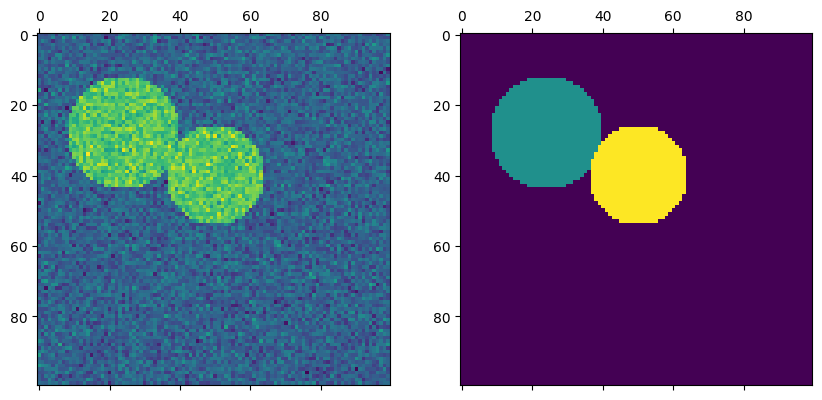

In [7]:
img = circle1 + circle2
mask = img.astype(bool)
img = img.astype(float)

img += 1 + 0.2 * np.random.randn(*img.shape)

graph = image.img_to_graph(img, mask=mask)
graph.data = np.exp(-graph.data / graph.data.std())

labels = spectral_clustering(graph, n_clusters=2, eigen_solver="arpack")
label_im = np.full(mask.shape, -1.0)
label_im[mask] = labels

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
axs[0].matshow(img)
axs[1].matshow(label_im)

plt.show()